In [73]:
import random
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import f
from statsmodels.stats.weightstats import *

In [70]:
random.seed(20)
X1 = [random.normalvariate(5,2) for _ in range(100)]
X2 = [random.normalvariate(5,2) for _ in range(100)]

In [71]:
np.sqrt((np.var(X2) + np.var(X1))/2)

2.074096894114259

In [72]:
F = np.var(X1) / np.var(X2)
F

0.8810527575155296

In [20]:
scipy.stats.f.cdf(F, 99, 99)

0.26493096174700725

In [21]:
p_value = 1 - scipy.stats.f.cdf(F, 99, 99)

In [22]:
p_value

0.7350690382529927

/home/dencerr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


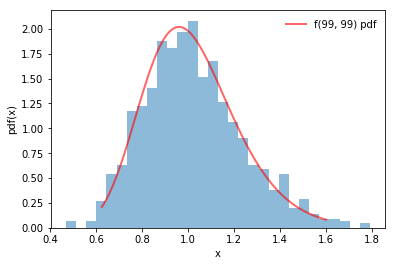

In [8]:
# генерим выборку
dfn = 99
dfd = 99
r = f.rvs(size=1000,random_state = 1,dfn = dfn,dfd = dfd)
x = np.linspace(f.ppf(0.01, dfn = dfn , dfd = dfd),
               f.ppf(0.99, dfn = dfn , dfd = dfd), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, f.pdf(x, dfn = dfn, dfd = dfd),
          'r-', lw=2, alpha=0.6, label='f(99, 99) pdf')
h = ax.hist(r,bins=30, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
plt.savefig('1.png')
plt.show()

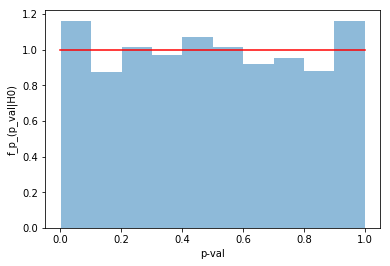

In [57]:
dfn = 99
dfd = 99
r = f.rvs(size=1000,random_state = 1,dfn = dfn,dfd = dfd)
r = 1 - f.cdf(r, dfn = dfn, dfd = dfd)
fig, ax = plt.subplots(1, 1)
ar = ax.hist(r, normed=True, histtype='stepfilled', alpha=0.5, bins = 10)
x = np.linspace(0.,1.)
ax.set_xlabel('p-val')
ax.set_ylabel('f_p_(p_val|H0)')
plt.plot(x ,[1]*len(x),c='red')
plt.savefig('2.png')

In [80]:
z = (np.mean(X1) - 5)/(np.std(X1)/10)
z

-0.5572208520220541

In [83]:
stats.t.cdf(z,99)*2

0.5786342010476353

In [87]:
z = np.sum((np.array(X1) - np.mean(X1))**2)/4
z

100.74628141629532

In [88]:
1 - stats.chi2.cdf(z,99)

0.43222503823829606

In [89]:
stats.ttest_ind(X1, X2)

Ttest_indResult(statistic=1.038773878963305, pvalue=0.3001767638279755)

In [90]:
F = np.sum((np.array(X1) - 5)**2)/np.sum((np.array(X2) - 5)**2)
F

0.8512563757117466

In [91]:
1 - f.cdf(F,dfn = 99, dfd = 99)

0.7877744342161442

In [92]:
F = np.sum((np.array(X1) - np.mean(X1))**2)/np.sum((np.array(X2) - np.mean(X2))**2)
F

0.8810527575155296

In [93]:
1 - f.cdf(F,dfn = 99, dfd = 99)

0.7350690382529927